In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("Dataset .csv")


In [3]:
df.head(3
       )

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [24]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Review_length'],
      dtype='object')

## Level 3 Task 1
## Task: Restaurant Reviews

## 1.1) Analyze the text reviews to identify the most common positive and negative keywords.


In [6]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 640.0 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
from wordcloud import WordCloud


In [8]:
positive_reviews = df[df['Rating text'].isin(['Excellent', 'Very Good', 'Good'])]['Rating text']
positive_reviews.value_counts()

Rating text
Good         2100
Very Good    1079
Excellent     301
Name: count, dtype: int64

In [9]:
negative_reviews = df[df['Rating text'].isin(['Average', 'Poor', 'Very Poor'])]['Rating text']
negative_reviews.value_counts()

Rating text
Average    3737
Poor        186
Name: count, dtype: int64

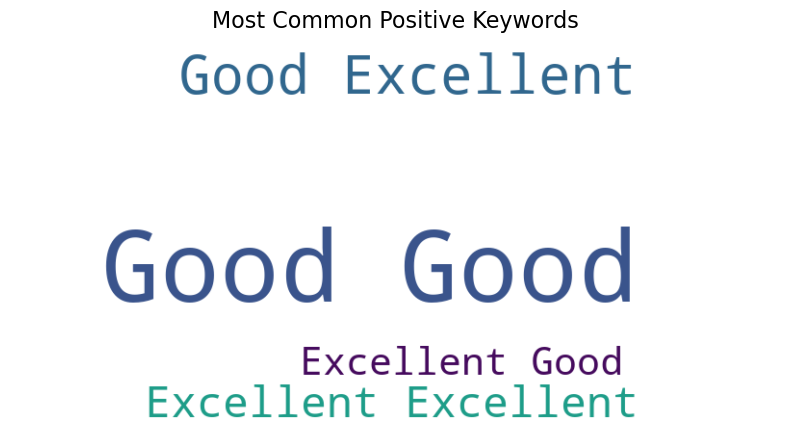

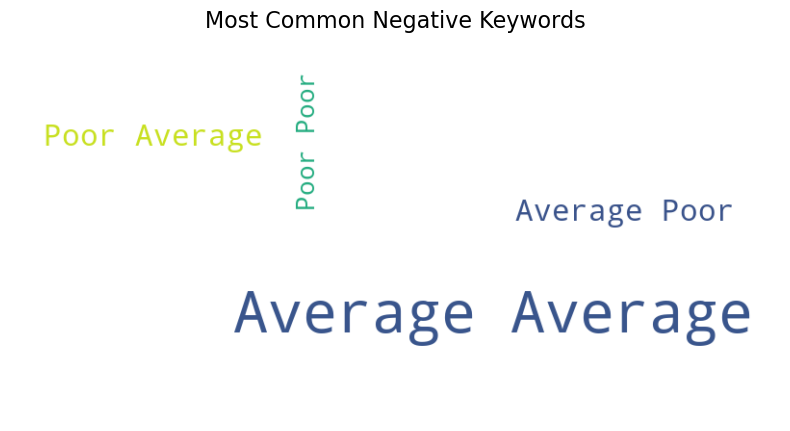

In [10]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


plot_wordcloud(' '.join(positive_reviews), 'Most Common Positive Keywords')
plot_wordcloud(' '.join(negative_reviews), 'Most Common Negative Keywords')


## 1.2) Calculate the average length of reviews and explore if there is a relationship between review length and rating.


In [11]:
def rating_len(text):
    text = text.replace(" ", "")
    return len(text)
df['Review_length'] = df['Rating text'].apply(rating_len)

In [12]:
average_length = df['Review_length'].mean()
print(f"Average Review Length: {average_length:.2f}")

Average Review Length: 6.68


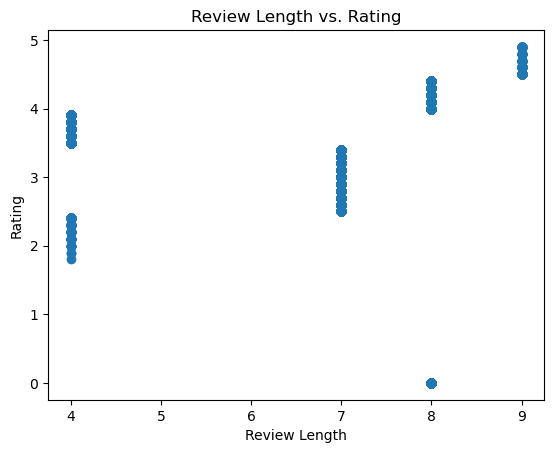

In [13]:
plt.scatter(df['Review_length'], df['Aggregate rating'])
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.title('Review Length vs. Rating')
plt.show()

## Task 2
## Task: Votes Analysis

## 2.1) Identify the restaurants with the highest and lowest number of votes.


In [14]:
 highest_votes = df[df['Votes'] == df['Votes'].max()]
highest_votes ## Highest votes restaurant

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review_length
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,No,No,No,No,4,4.8,Dark Green,Excellent,10934,9


In [15]:
lowest_votes = df[df['Votes'] == df['Votes'].min()]
lowest_votes ## Lowest votes restaurant

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review_length
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,0,8
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,No,1,0.0,White,Not rated,0,8
879,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0,8
880,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.492325,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,8
887,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307448,28.469594,Desserts,...,No,No,No,No,1,0.0,White,Not rated,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,18486858,6 Packs Momos,1,Noida,"Spice World Mall, Sector 25, Noida","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.340602,28.586000,Chinese,...,No,No,No,No,1,0.0,White,Not rated,0,8
9098,18431152,Cafe' Wow,1,Noida,"Food Court, 3rd Floor, The Great India Palace ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325600,28.567514,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,0,8
9099,18439721,Chef's Basket Pop Up Caf��,1,Noida,"Inside Big Bazaar, The Great India Place, Sect...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",0.000000,0.000000,"Italian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0,8
9103,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.323213,28.567751,"Continental, Lebanese, Mexican",...,Yes,No,No,No,3,0.0,White,Not rated,0,8


## 2.2) Analyze if there is a correlation between the number of votes and the rating of a restaurant.

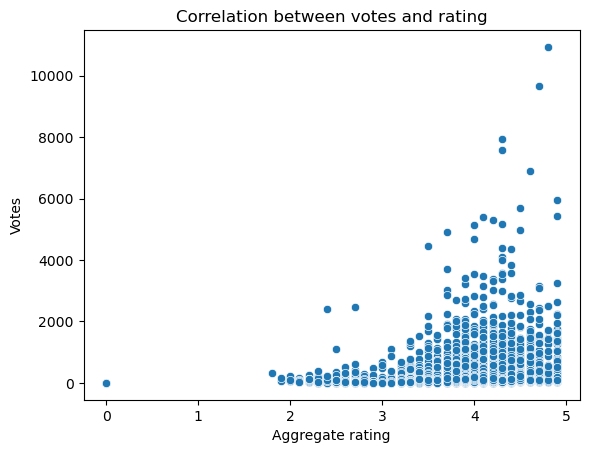

In [16]:
sns.scatterplot(y=df['Votes'], x=df['Aggregate rating'])
plt.title("Correlation between votes and rating")
plt.show()

In [17]:
df['Votes'].corr(df['Aggregate rating'])


0.3136905841954117

## Task 3
## Task: Price Range vs. Online Delivery and Table Booking


## 3.1) Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

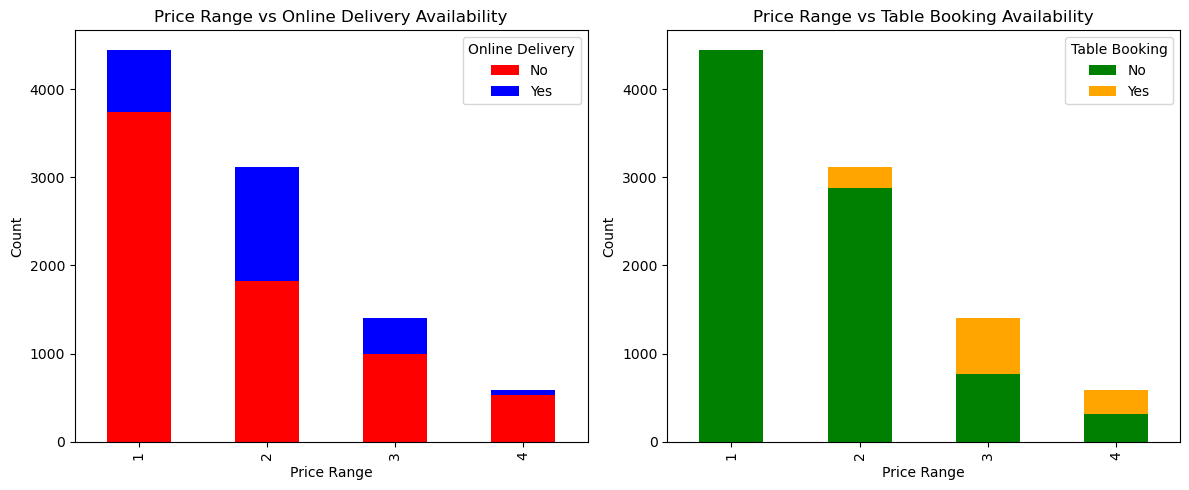

In [19]:
online_delivery_crosstab = pd.crosstab(df['Price range'], df['Has Online delivery'])


table_booking_crosstab = pd.crosstab(df['Price range'], df['Has Table booking'])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

online_delivery_crosstab.plot(kind='bar', stacked=True,  ax=axes[0], color=['red', 'blue'])
axes[0].set_title('Price Range vs Online Delivery Availability')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Count')
axes[0].legend(title='Online Delivery')

table_booking_crosstab.plot(kind='bar', stacked=True, ax=axes[1], color=['g', 'orange'])
axes[1].set_title('Price Range vs Table Booking Availability')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Count')
axes[1].legend(title='Table Booking')

plt.tight_layout()
plt.show()

## 3.2) Determine if higher-priced restaurants are more likely to offer these services


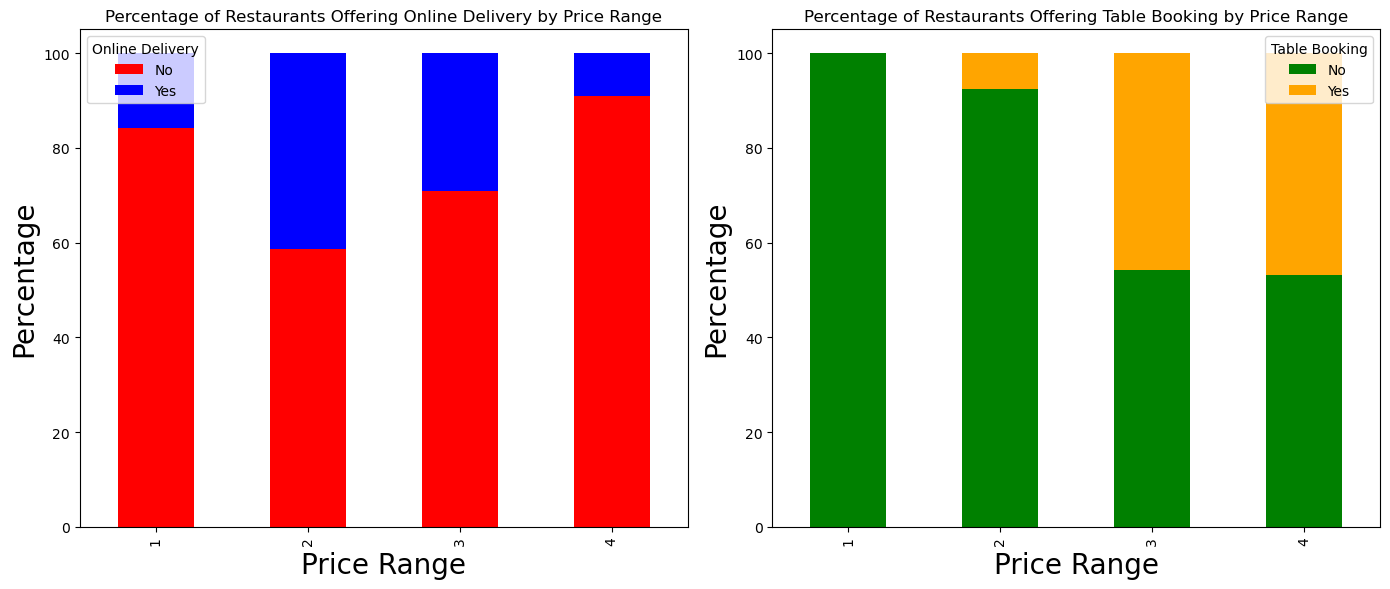

In [20]:
online_delivery_percent = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100


table_booking_percent = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack() * 100


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


online_delivery_percent.plot(kind='bar', stacked=True, ax=axes[0], color=['red', 'blue'])
axes[0].set_title('Percentage of Restaurants Offering Online Delivery by Price Range')
axes[0].set_xlabel('Price Range', fontsize=20)
axes[0].set_ylabel('Percentage', fontsize=20)
axes[0].legend(title='Online Delivery')


table_booking_percent.plot(kind='bar', stacked=True, ax=axes[1], color=['g', 'orange'])
axes[1].set_title('Percentage of Restaurants Offering Table Booking by Price Range')
axes[1].set_xlabel('Price Range', fontsize=20)
axes[1].set_ylabel('Percentage', fontsize=20)
axes[1].legend(title='Table Booking')


plt.tight_layout()
plt.show()

In [21]:
online_delivery_percent

Has Online delivery,No,Yes
Price range,,
1,84.225923,15.774077
2,58.689367,41.310633
3,70.809659,29.190341
4,90.955631,9.044369


In [22]:
table_booking_percent


Has Table booking,No,Yes
Price range,,
1,99.977498,0.022502
2,92.322518,7.677482
3,54.261364,45.738636
4,53.242321,46.757679
